In [ ]:
import torch
import torchvision
import torchvision.models as models
from torchvision.models.resnet import ResNet50_Weights
import lightning.pytorch as pl

from mymodels import Model_Wrapper, Preprocess
from myutils import View, sample_imgs_list

In [ ]:
# configs to speed up training
torch.set_float32_matmul_precision('medium')
torch.backends.cuda.matmul.allow_tf32 = True
torch.backends.cudnn.allow_tf32 = True

In [ ]:
PATH_TO_IMAGENET = '../../datasets/imagenet/2012/'

In [ ]:
resnet50 = models.resnet50(weights=ResNet50_Weights.DEFAULT)
resnet50 = Model_Wrapper(resnet50)
trainer = pl.Trainer(accelerator="auto", limit_test_batches=100)

In [ ]:
# get transforms
prep = Preprocess(PATH_TO_IMAGENET, (224, 224), shuffle=True)
preview_img_slice = [1, 3000, 7000, 9000, 15001]

In [ ]:
def compare_ds(model, datasets, labels, view_img_slice, view_only=False, figsize=(12,6), verbose=True, skip_results:list=[0]):
    results = {}
    samples = []
    #display first
    for ds in datasets:
        samples.append(sample_imgs_list(ds, view_img_slice))
    _ = View.compare_color(samples, labels, figsize=figsize)
    
    if not view_only:
        for i in range(len(datasets)):
            if i in skip_results:
                continue
            result = trainer.test(model, datasets[i], verbose=verbose)
            results[labels[i]] = result
        return results
    else:
        return None
    

##### Test On Orignal Dataset

In [ ]:
prep.reset_trans()
imgnet_orig = prep.get_loader()
sample_orig = sample_imgs_list(imgnet_orig, preview_img_slice)# test model on original images
# result_orig = trainer.test(resnet50, imgnet_orig)

##### Test on Dark Images

In [ ]:
prep.reset_trans()
imgnet_dark = prep.luminance(1/8).get_loader()
imgnet_dark_histeq = prep.copy().hist_eq().get_loader()
imgnet_dark_retinex = prep.copy().retinex('SSR', 100).get_loader()
imgnet_dark_results = compare_ds(resnet50, 
                                 [prep.basic_loader(), imgnet_dark, imgnet_dark_histeq, imgnet_dark_retinex],
                                 ['Original', 'Dark', 'Dark + HistEQ', 'Dark + Retinex'], 
                                 preview_img_slice,
                                 view_only=True)

##### Test on Over Exposed Images

In [ ]:
prep.reset_trans()
imgnet_bright = prep.luminance(2).get_loader()
imgnet_bright_histeq = prep.copy().hist_eq().get_loader()
imgnet_bright_retinex = prep.copy().retinex('SSR', 100).get_loader()
imgnet_bright_results = compare_ds(resnet50, 
                                 [prep.basic_loader(), imgnet_bright, imgnet_bright_histeq, imgnet_bright_retinex],
                                 ['Original', 'Bright', 'Bright + HistEQ', 'Bright + Retinex'], 
                                 preview_img_slice)

##### Test on hazy images

<Figure size 1200x600 with 0 Axes>

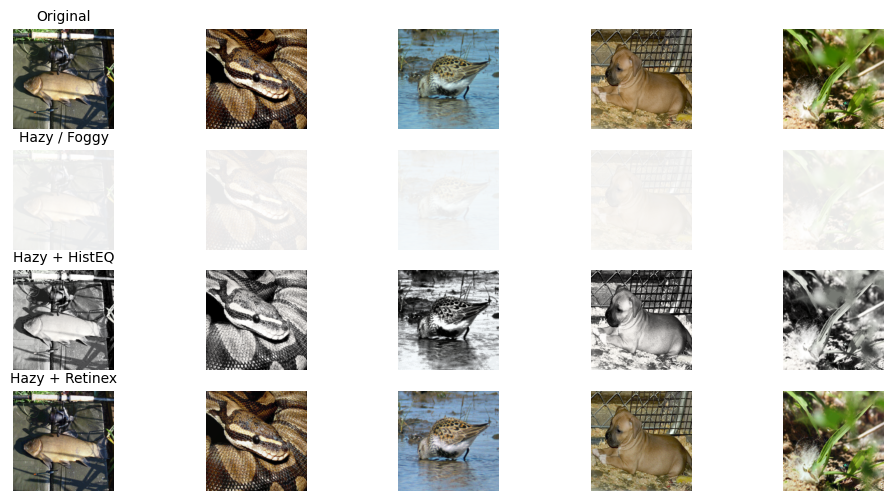

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       Confidence %        │    27.645824432373047     │
│      Pixel Val MEAN       │    242.52484130859375     │
│       Pixel Val STD       │     4.961328983306885     │
│        Top 1 Acc %        │         60.390625         │
│        Top 5 Acc %        │        82.3203125         │
└───────────────────────────┴───────────────────────────┘

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       Confidence %        │    29.950918197631836     │
│      Pixel Val MEAN       │    135.56610107421875     │
│       Pixel Val STD       │     75.2563247680664      │
│        Top 1 Acc %        │         58.28125          │
│        Top 5 Acc %        │         81.046875         │
└───────────────────────────┴───────────────────────────┘

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       Confidence %        │    37.473453521728516     │
│      Pixel Val MEAN       │     115.8434829711914     │
│       Pixel Val STD       │     51.65338897705078     │
│        Top 1 Acc %        │        77.0390625         │
│        Top 5 Acc %        │        93.9453125         │
└───────────────────────────┴───────────────────────────┘

In [22]:
prep.reset_trans()
imgnet_mod = prep.fog(10).get_loader()
imgnet_mod_histeq = prep.copy().hist_eq().get_loader()
imgnet_mod_retinex = prep.copy().retinex('SSR', 100).get_loader()
imgnet_mod_results = compare_ds(resnet50, 
                                 [prep.basic_loader(), imgnet_mod, imgnet_mod_histeq, imgnet_mod_retinex],
                                 ['Original', 'Hazy / Foggy', 'Hazy + HistEQ', 'Hazy + Retinex'], 
                                 preview_img_slice,
                                 view_only=False)

##### Test on Dark Rainy Images

<Figure size 1200x600 with 0 Axes>

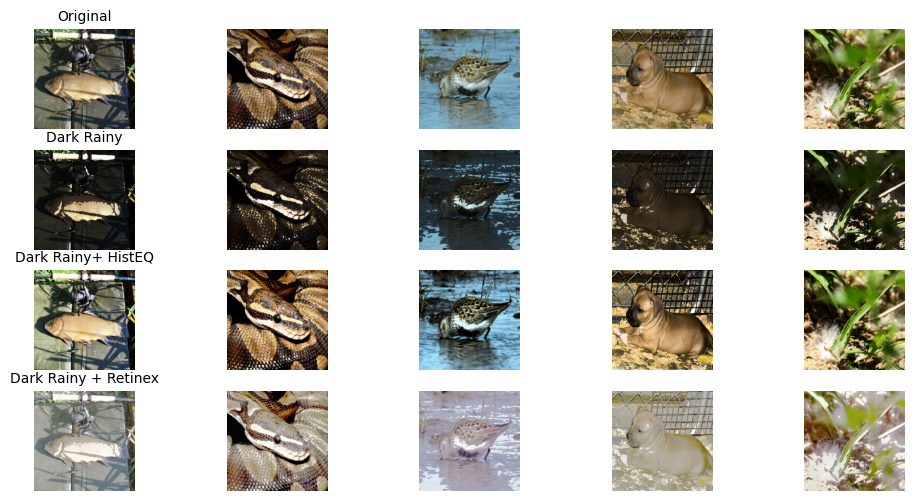

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2023-04-07 14:23:28.766822: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-07 14:23:29.063304: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-04-07 14:23:29.718512: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/jon/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-04-07 14:23:29.718842: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load 

Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       Confidence %        │    30.210281372070312     │
│      Pixel Val MEAN       │     67.3699722290039      │
│       Pixel Val STD       │    61.214576721191406     │
│        Top 1 Acc %        │          59.625           │
│        Top 5 Acc %        │        81.5234375         │
└───────────────────────────┴───────────────────────────┘

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       Confidence %        │     36.64479064941406     │
│      Pixel Val MEAN       │     109.4642562866211     │
│       Pixel Val STD       │     68.30501556396484     │
│        Top 1 Acc %        │        74.4296875         │
│        Top 5 Acc %        │          92.375           │
└───────────────────────────┴───────────────────────────┘

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       Confidence %        │     32.1999626159668      │
│      Pixel Val MEAN       │    157.38653564453125     │
│       Pixel Val STD       │     45.1605224609375      │
│        Top 1 Acc %        │         64.234375         │
│        Top 5 Acc %        │         85.546875         │
└───────────────────────────┴───────────────────────────┘

In [21]:
prep.reset_trans()
imgnet_mod = prep.rain(2, 75).get_loader()
imgnet_mod_histeq = prep.copy().hist_eq().get_loader()
imgnet_mod_retinex = prep.copy().retinex('SSR', 100).get_loader()
imgnet_mod_results = compare_ds(resnet50, 
                                 [prep.basic_loader(), imgnet_mod, imgnet_mod_histeq, imgnet_mod_retinex],
                                 ['Original', 'Dark Rainy', 'Dark Rainy+ HistEQ', 'Dark Rainy + Retinex'], 
                                 preview_img_slice,
                                 view_only=False)

##### Test Histogram Eq on Low Contrast Images

In [ ]:
# prep.reset_trans()
# imgnet_low_cont = prep.brightness_contrast(0,5).get_loader()
# imgnet_low_cont_histeq = prep.copy().hist_eq().get_loader()
# imgnet_low_cont_retinex = prep.copy().retinex('SSR', 100).get_loader()
# imgnet_low_cont_results = compare_ds(resnet50, 
#                                  [prep.basic_loader(), imgnet_low_cont, imgnet_low_cont_histeq, imgnet_low_cont_retinex],
#                                  ['Original', 'Low Contrast', 'Low Contrast + HistEQ', 'Low Contrast + Retinex'], 
#                                  preview_img_slice)

##### Test Remapping Distribution to be low contrast

In [ ]:
# prep.reset_trans()
# imgnet_mod = prep.dist_remap(20/255,20/255).get_loader()
# imgnet_mod_histeq = prep.copy().hist_eq().get_loader()
# imgnet_mod_retinex = prep.copy().retinex('SSR', 100).get_loader()
# imgnet_mod_results = compare_ds(resnet50, 
#                                  [prep.basic_loader(), imgnet_mod, imgnet_mod_histeq, imgnet_mod_retinex],
#                                  ['Original', 'Low Contrast', 'Low Contrast + HistEQ', 'Low Contrast + Retinex'], 
#                                  preview_img_slice,
#                                  view_only=False)